In [1]:
import tensorflow as tf
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
              [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
              [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
              [816, 820.958984, 1008100, 815.48999, 819.23999],
              [819.359985, 823, 1188100, 818.469971, 818.97998],
              [819, 823, 1198100, 816, 820.450012],
              [811.700012, 815.25, 1098100, 809.780029, 813.669983],
              [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

def MinMaxScaler(data):
    bunja = data - np.min(data,0) #axis=0 이 행임
    bunmo = np.max(data,0) - np.min(data, 0)
    return bunja/bunmo+1e-10


In [8]:

xy = MinMaxScaler(xy)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]


X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([4,1]))
b = tf.Variable(tf.random_normal([1]))

hypothesis = tf.matmul(X,W)+b
cost = tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
# MNIST 시작

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [15]:
print(mnist.train.images,mnist.train.labels)
print(mnist.train.images.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
(55000, 784)


In [16]:
train = mnist.train.images
label = mnist.train.labels

In [29]:
x_test = mnist.test.images
y_test = mnist.test.labels

In [48]:
X = tf.placeholder(tf.float32, shape=[None,784])
Y = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.random_normal([784,10]))
b = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(X,W)+b
hypothesis = tf.nn.softmax(logits)
# cost = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y)
cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(hypothesis),axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2).minimize(cost)


In [24]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2000):
    c,_ = sess.run([cost,optimizer] , feed_dict={X : train, Y: label})
    if step % 100 ==0:
        print(c)

[25.530323  34.171223   7.8078218 ... 26.419735   7.058046   7.469428 ]
[7.85151339e+00 1.38074255e+01 3.85259748e-01 ... 4.26726580e+00
 5.02194822e-01 1.10821687e-02]
[5.3760214 8.580471  0.866308  ... 1.354418  0.2274072 0.0293554]
[4.454357   5.7492228  1.26426    ... 0.36356428 0.17937338 0.03629152]
[3.9245088  3.903304   1.5359228  ... 0.11245766 0.16802968 0.04349789]
[3.570313   2.6176207  1.7290471  ... 0.04490066 0.16295458 0.05234509]
[3.3219407  1.7165799  1.8783495  ... 0.02259696 0.15865254 0.06203081]
[3.1533759  1.1100826  1.9996212  ... 0.01397585 0.15492527 0.07204011]
[3.0553443  0.72323835 2.1000242  ... 0.01033195 0.15217388 0.0821356 ]
[3.0156267  0.4843467  2.1844642  ... 0.0087958  0.15037341 0.09207234]
[3.0179935  0.33688802 2.2567682  ... 0.00828047 0.14929487 0.10161024]
[3.0493555  0.24394524 2.3198295  ... 0.00832185 0.14868322 0.11069442]
[3.0996764  0.18350911 2.376116   ... 0.00870268 0.14829645 0.11941344]
[3.161286   0.1428142  2.4277804  ... 0.00931

In [49]:
is_correct = tf.equal(tf.argmax(hypothesis,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [53]:
bool(0)

False

In [50]:
training_epoch = 30
batch_size = 100

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    avg_cost=0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :", epoch , "avg_cost : ",avg_cost)
    


Epoch : 0 avg_cost :  9.009284843965002
Epoch : 1 avg_cost :  4.5574887384067875
Epoch : 2 avg_cost :  2.9651831616054873
Epoch : 3 avg_cost :  2.3362812356515383
Epoch : 4 avg_cost :  1.939399027607658
Epoch : 5 avg_cost :  1.7325848976048557
Epoch : 6 avg_cost :  1.5486415714567372
Epoch : 7 avg_cost :  1.4409722353111603
Epoch : 8 avg_cost :  1.351752435727553
Epoch : 9 avg_cost :  1.2651126043363061
Epoch : 10 avg_cost :  1.21076068834825
Epoch : 11 avg_cost :  1.156215441660448
Epoch : 12 avg_cost :  1.1208141326091512
Epoch : 13 avg_cost :  1.0716053084351813
Epoch : 14 avg_cost :  1.0392727379365394
Epoch : 15 avg_cost :  1.016926033767787
Epoch : 16 avg_cost :  0.9900996569611799
Epoch : 17 avg_cost :  0.9736592410369354
Epoch : 18 avg_cost :  0.9324131881106991
Epoch : 19 avg_cost :  0.9303458474982863
Epoch : 20 avg_cost :  0.9101597367633467
Epoch : 21 avg_cost :  0.8855596035447988
Epoch : 22 avg_cost :  0.8752057826789944
Epoch : 23 avg_cost :  0.8569148915464224
Epoch : 2

In [51]:
sess.run(accuracy, feed_dict={X:x_test, Y:y_test})

0.8431

In [54]:
import random
import matplotlib.pyplot as plt

label :  [5]
prediction :  [5]


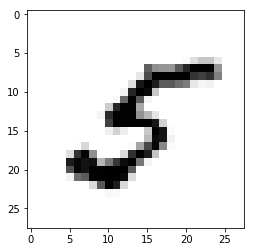

In [69]:
# 시각화로 확인해보기 ㅎㅎ

r = random.randint(0, mnist.test.num_examples-1)
print('label : ',sess.run(tf.argmax(mnist.test.labels[[r]],1)))
print('prediction : ',sess.run(tf.argmax(hypothesis,1), feed_dict={X:mnist.test.images[[r]]}))

plt.imshow(
    mnist.test.images[[r]].reshape(28,28),
    cmap='Greys',
    interpolation='nearest')